# Health Care Data Analysis Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load healthcare dataset
df = pd.read_csv("Downloads/healthcare_dataset.csv")

### To view and Clean Data

In [4]:
# To view and clean data 
print(df.head())
print(df.info())
print(df.isnull().sum())

  Patient_ID  Age  Gender             Symptoms Diagnosis           Medication  \
0      P1000   84  Female                Cough  Covid-19              Insulin   
1      P1001   35    Male             Headache       Flu  Vitamin Supplements   
2      P1002   14  Female            Dizziness       Flu              Insulin   
3      P1003   43  Female  Shortness of Breath       Flu          Antibiotics   
4      P1004   35    Male                Cough    Asthma          Paracetamol   

   Glucose_Level  BP_Systolic  BP_Diastolic  Cholesterol  Visit_Date  \
0            187           92            82          230  2023-07-06   
1            128           95           110          247  2023-11-16   
2            196           99           110          174  2023-07-12   
3            168          133            72          176  2023-10-18   
4            119          171           112          202  2023-01-03   

  Treatment_Outcome  
0         Improving  
1         Recovered  
2         Impr

In [5]:
# Convert visit date to datetime format (Visit date is an object instead of datetime)
df["Visit_Date"] = pd.to_datetime(df["Visit_Date"])

### Exploratory Data Analysis

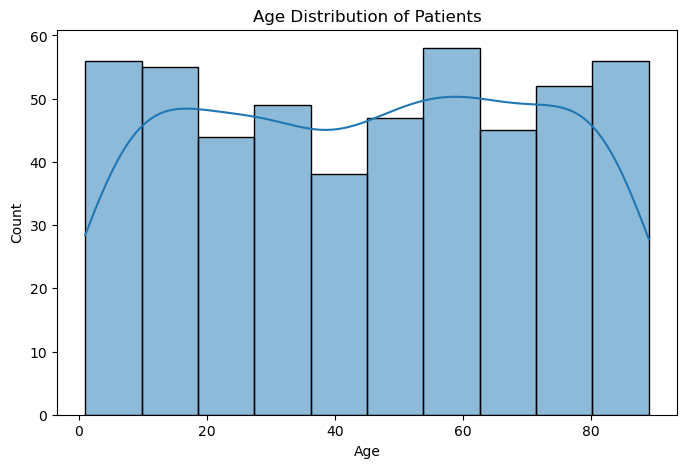

Saved: plots\Age Distribution of Patients.png


<Figure size 640x480 with 0 Axes>

In [27]:
# Age distribution (using histogram)

plt.figure(figsize=(8,5)) 
sns.histplot(df["Age"], kde=True) # kernel density estimate shows the smoother version of the distribution
plt.title("Age Distribution of Patients")
plt.show()
save_plot("Age Distribution of Patients")

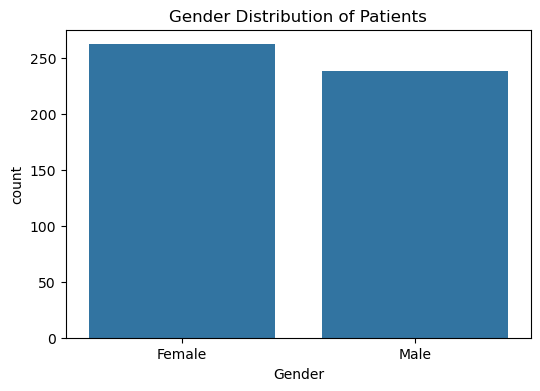

In [7]:
# Gender count

plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution of Patients")
plt.show()
save_plot(Gender Dist)

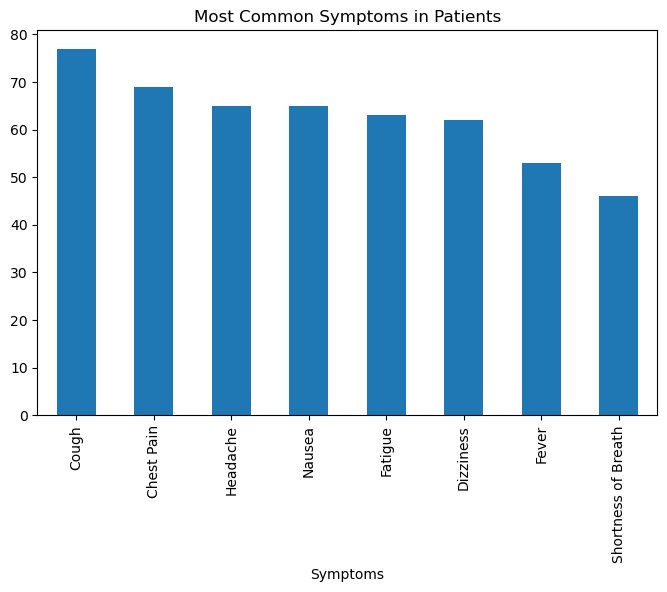

In [8]:
# Most common symptoms using bar chart

plt.figure(figsize=(8,5))
df["Symptoms"].value_counts().plot(kind="bar")
plt.title("Most Common Symptoms in Patients")
plt.show()

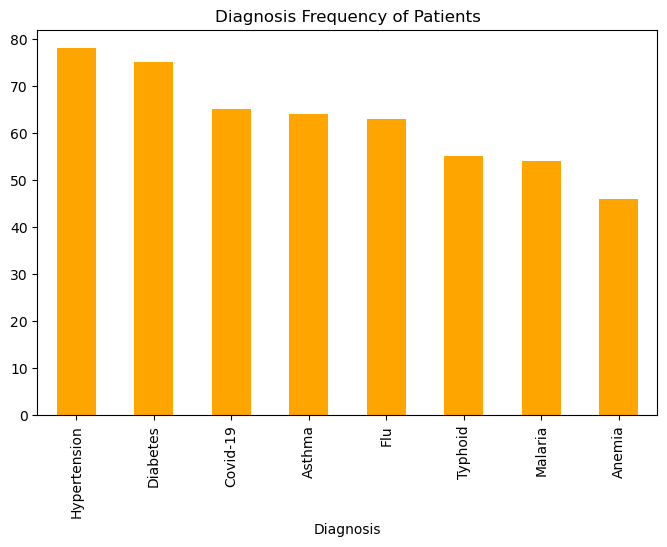

In [9]:
# Most common diagnoses

plt.figure(figsize=(8,5))
df["Diagnosis"].value_counts().plot(kind="bar", color="orange")
plt.title("Diagnosis Frequency of Patients")
plt.show()

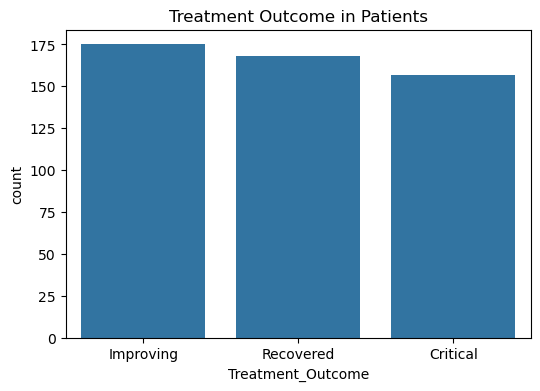

In [10]:
# Treatment outcome distribution

plt.figure(figsize=(6,4))
sns.countplot(x="Treatment_Outcome", data=df)
plt.title("Treatment Outcome in Patients")
plt.show()

In [11]:
# Age Group Creation

bins = [0, 12, 18, 35, 50, 65, 100]
labels = ["Child", "Teen", "Young Adult", "Adult", "Middle Age", "Elderly"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

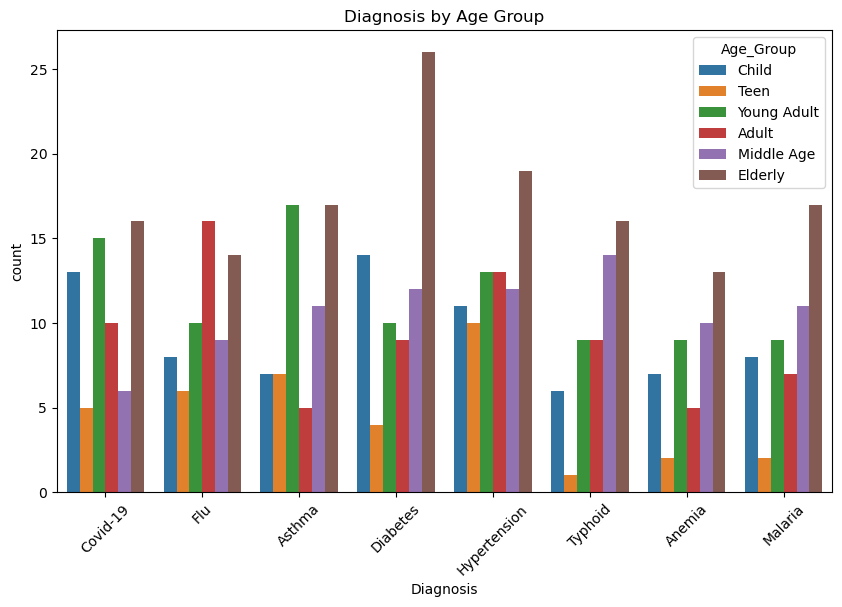

In [12]:
#  Diagnosis vs Age

plt.figure(figsize=(10,6))
sns.countplot(x="Diagnosis", hue="Age_Group", data=df)
plt.title("Diagnosis by Age Group")
plt.xticks(rotation=45)
plt.show()

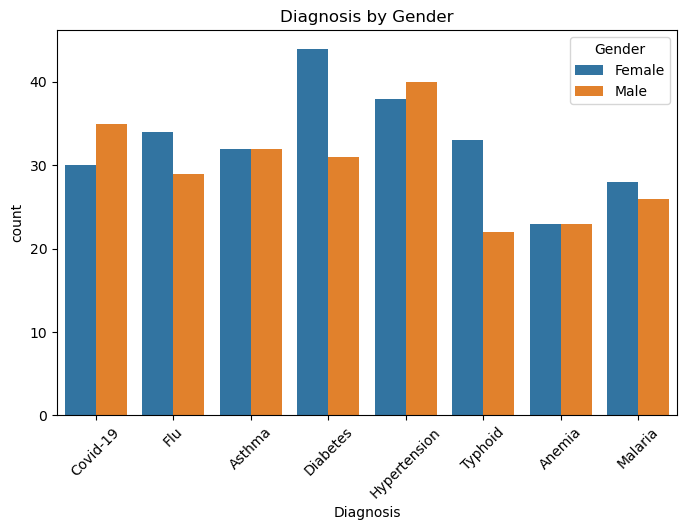

In [13]:
# Gender vs Diagnosis

plt.figure(figsize=(8,5))
sns.countplot(x="Diagnosis", hue="Gender", data=df)
plt.title("Diagnosis by Gender")
plt.xticks(rotation=45)
plt.show()

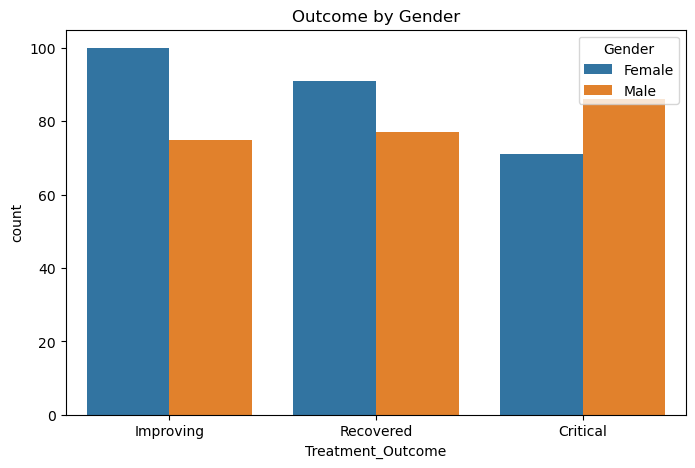

In [14]:
#  Gender vs Patient treatment outcome

plt.figure(figsize=(8,5))
sns.countplot(x="Treatment_Outcome", hue="Gender", data=df)
plt.title("Outcome by Gender")
plt.show()

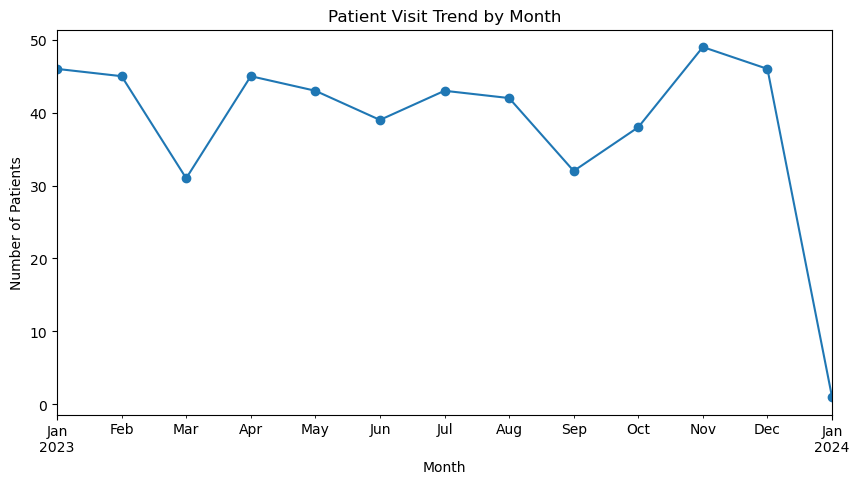

In [15]:
#  Monthly Patient Cases

df["Month"] = df["Visit_Date"].dt.to_period("M")

plt.figure(figsize=(10,5))
df["Month"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Patient Visit Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Patients")
plt.show()

### Lab Result Analysis

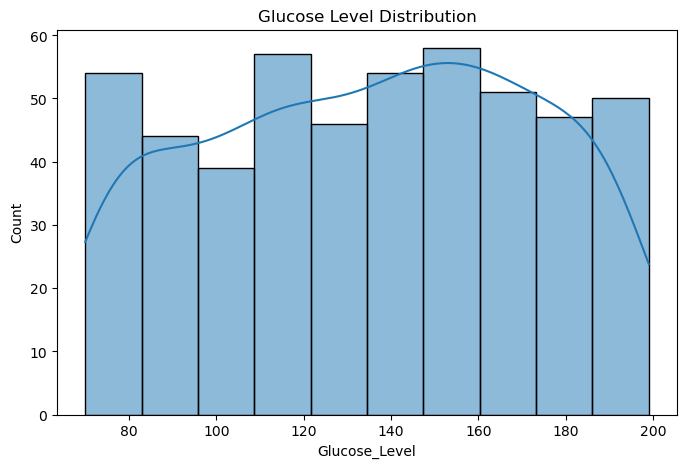

In [16]:
# Glucose level distribution of patients

plt.figure(figsize=(8,5))
sns.histplot(df["Glucose_Level"], kde=True)
plt.title("Glucose Level Distribution")
plt.show()

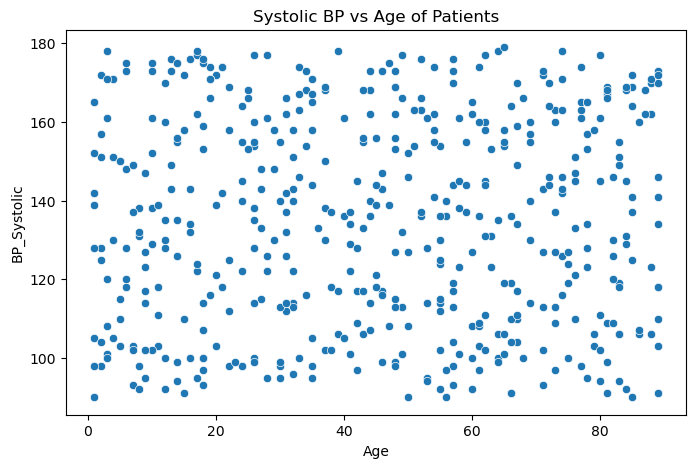

In [17]:
# Blood pressure vs age of patients

plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="BP_Systolic", data=df)
plt.title("Systolic BP vs Age of Patients")
plt.show()

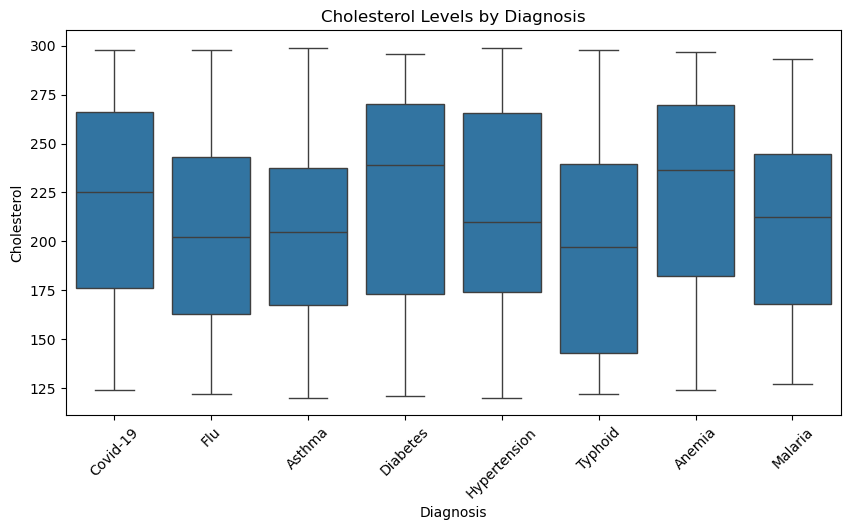

In [18]:
# Cholesterol by diagnosis

plt.figure(figsize=(10,5))
sns.boxplot(x="Diagnosis", y="Cholesterol", data=df)
plt.xticks(rotation=45)
plt.title("Cholesterol Levels by Diagnosis")
plt.show()

### Medication Analysis

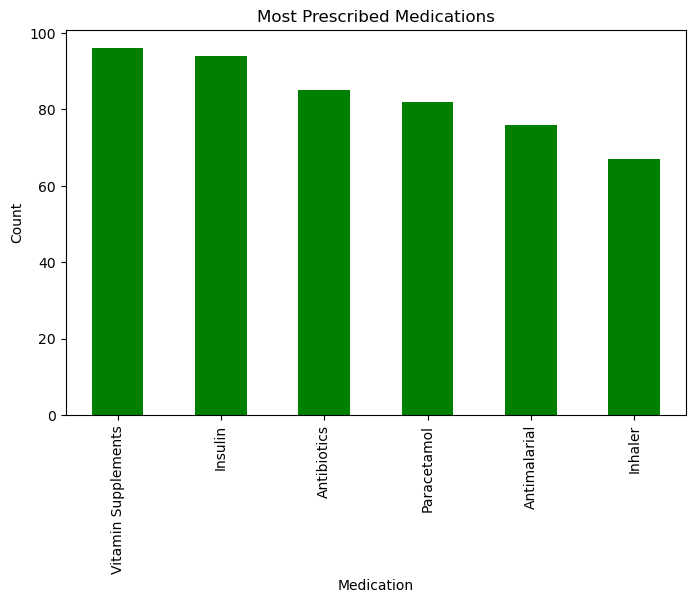

In [19]:
#  Most prescribed medications

plt.figure(figsize=(8,5))
df["Medication"].value_counts().plot(kind="bar", color="green")
plt.title("Most Prescribed Medications")
plt.xlabel("Medication")
plt.ylabel("Count")
plt.show()

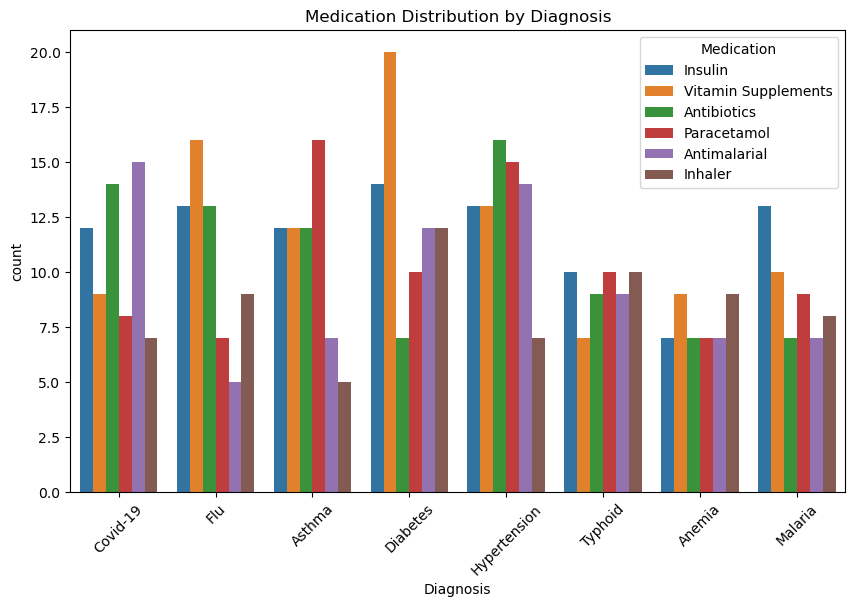

In [20]:
# Medication per diagnosis

plt.figure(figsize=(10,6))
sns.countplot(x="Diagnosis", hue="Medication", data=df)
plt.title("Medication Distribution by Diagnosis")
plt.xticks(rotation=45)
plt.show()

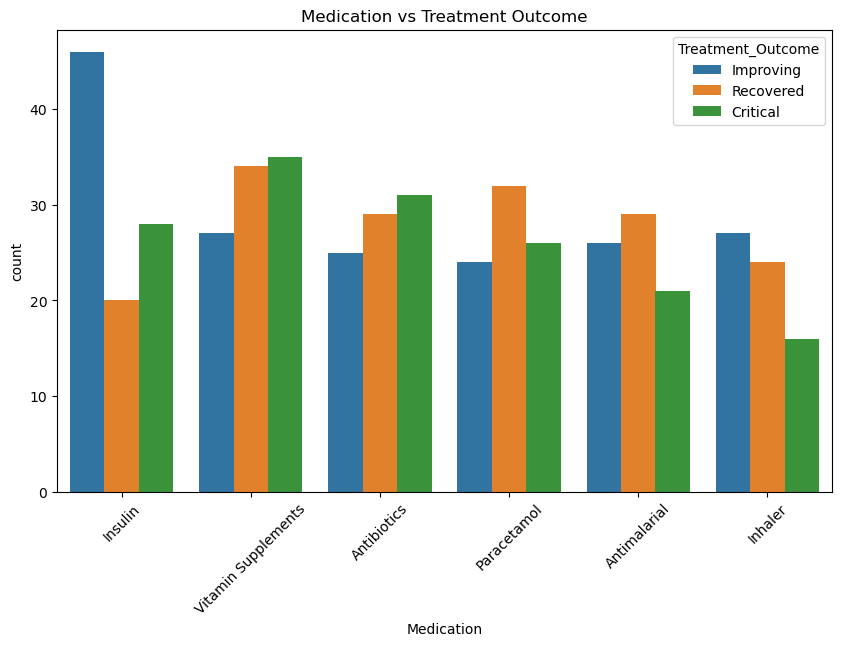

In [21]:
#  Medication and treatment outcome

plt.figure(figsize=(10,6))
sns.countplot(x="Medication", hue="Treatment_Outcome", data=df)
plt.title("Medication vs Treatment Outcome")
plt.xticks(rotation=45)
plt.show()

In [22]:
#  Average age of patients receiving each medication

avg_age_med = df.groupby("Medication")["Age"].mean()
print("\nAverage Age of Patients per Medication:")
print(avg_age_med)


Average Age of Patients per Medication:
Medication
Antibiotics            38.000000
Antimalarial           46.578947
Inhaler                44.313433
Insulin                48.425532
Paracetamol            48.000000
Vitamin Supplements    45.156250
Name: Age, dtype: float64


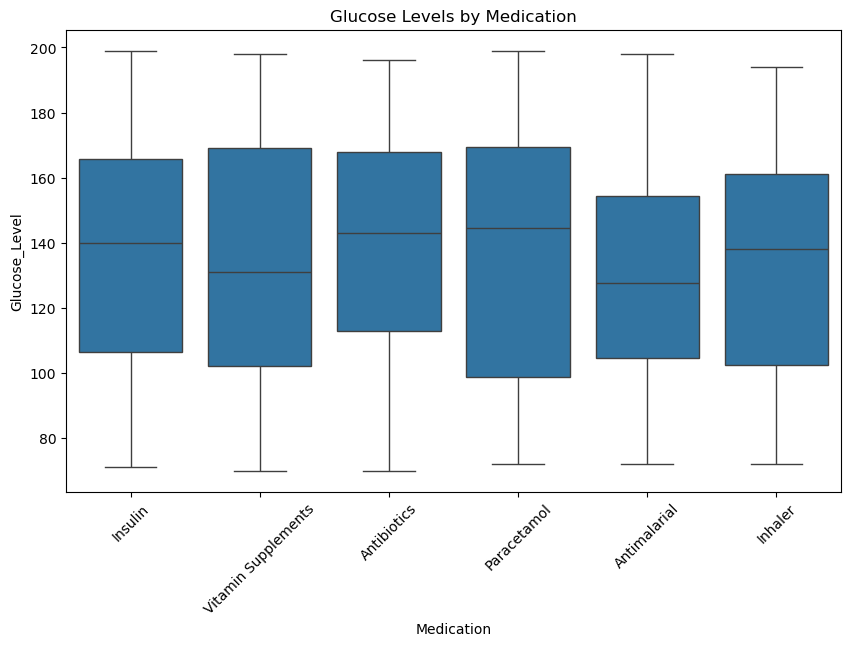

In [23]:
#  Lab results comparison per medication

plt.figure(figsize=(10,6))
sns.boxplot(x="Medication", y="Glucose_Level", data=df)
plt.title("Glucose Levels by Medication")
plt.xticks(rotation=45)
plt.show()

### Relationships and Insights 

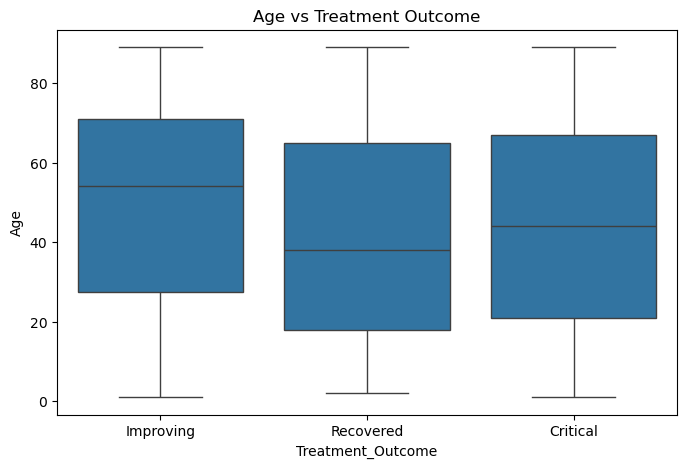

In [24]:
# Does age influence outcome?

plt.figure(figsize=(8,5))
sns.boxplot(x="Treatment_Outcome", y="Age", data=df)
plt.title("Age vs Treatment Outcome")
plt.show()

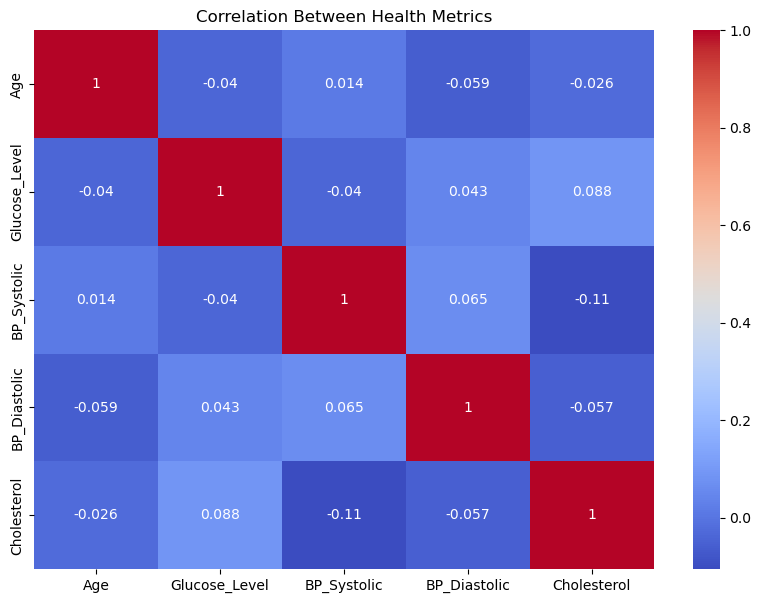

In [25]:
 # Correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(df[["Age","Glucose_Level","BP_Systolic","BP_Diastolic","Cholesterol"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Health Metrics")
plt.show()

### To Save all Visualization

In [26]:
import os
from datetime import datetime

# Folder to save all plots
SAVE_DIR = "plots"
os.makedirs(SAVE_DIR, exist_ok=True)

def save_plot(name=None):
    """Automatically save plot with name or timestamp."""
    if name is None:
        name = datetime.now().strftime("%Y%m%d_%H%M%S")
    filepath = os.path.join(SAVE_DIR, f"{name}.png")
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"Saved: {filepath}")

